In [50]:
import pandas as pd
import celldancer.utilities as cdutil
import celldancer as cd
import anndata as ad

### M2 Macrophage scRNA-seq Data after obtaining spliced and unspliced from velocyto

In [51]:
Macro_2 =  ad.read_h5ad("/home/yang/PM_AD/Submission/Figure5/Macro_2_data_20_3000.h5ad")

In [52]:
Macro_2

AnnData object with n_obs × n_vars = 2044 × 4707
    obs: 'Status', 'Site', 'Tissue', 'Enrichment', 'Location', 'donor_id', 'Sex', 'Age', 'stage', 'final_clustering', 'n_genes', 'Annotation', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'leiden', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'feature_types-SKN8090524', 'gene_ids-SKN8090525', 'feature_types-SKN8090525', 'gene_ids-SKN8090526', 'feature_types-SKN8090526', 'gene_ids-SKN8090527', 'feature_types-SKN8090527', 'gene_ids-SKN8090528', 'feature_types-SKN8090528', 'gene_ids-SKN8090529', 'feature_types-SKN8090529', 'gene_ids-SKN8090530', 'feature_types-SKN8090530', 'gene_ids-SKN8090531', 'feature_types-SKN8090531', 'gene_ids-SKN8090536', 'feature_types-SKN8090536', 'gene_ids-SKN8090537', 'feature_types-SKN8090537', 'gene_ids-SKN8090538', 'feature_types-SKN8090538', 'gene_ids-SKN8090539', 'feature_types-SKN8090539', 'gene_ids-SKN8090540

In [53]:
Macro_2.var.head()

,feature_types-SKN8090524,gene_ids-SKN8090525,feature_types-SKN8090525,gene_ids-SKN8090526,feature_types-SKN8090526,gene_ids-SKN8090527,feature_types-SKN8090527,gene_ids-SKN8090528,feature_types-SKN8090528,gene_ids-SKN8090529,...,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,velocity_genes
index,,,,,,,,,,,,,,,,,,,,,
HES4,Gene Expression,ENSG00000188290,Gene Expression,ENSG00000188290,Gene Expression,ENSG00000188290,Gene Expression,ENSG00000188290,Gene Expression,ENSG00000188290,...,0.356886,0.310448,0.0,0.0,0.453857,0.055572,0.890759,0.476158,3.018083,True
ISG15,Gene Expression,ENSG00000187608,Gene Expression,ENSG00000187608,Gene Expression,ENSG00000187608,Gene Expression,ENSG00000187608,Gene Expression,ENSG00000187608,...,0.372584,0.281332,0.0,0.0,0.483781,0.285472,0.935674,0.571472,2.191993,True
TNFRSF18,Gene Expression,ENSG00000186891,Gene Expression,ENSG00000186891,Gene Expression,ENSG00000186891,Gene Expression,ENSG00000186891,Gene Expression,ENSG00000186891,...,0.720515,0.239099,0.0,0.0,0.492401,0.450898,2.113861,0.622573,2.320133,True
TNFRSF4,Gene Expression,ENSG00000186827,Gene Expression,ENSG00000186827,Gene Expression,ENSG00000186827,Gene Expression,ENSG00000186827,Gene Expression,ENSG00000186827,...,0.580612,0.310361,0.0,0.0,0.492240,0.124842,2.252252,0.442302,4.173465,True
SDF4,Gene Expression,ENSG00000078808,Gene Expression,ENSG00000078808,Gene Expression,ENSG00000078808,Gene Expression,ENSG00000078808,Gene Expression,ENSG00000078808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [54]:
### Load module data.
gene = pd.read_excel("/home/yang/PM_AD/Submission/Table/Supplementary_Tables_S5_net.xlsx", index_col=2)

In [55]:
gene.head()

,Unnamed: 0,Unnamed: 0.1,modularity_class,X,Y,Size,Color,ENSEM
Label,,,,,,,,
LYVE1,0,LYVE1_ENSG00000133800,A,26.665518,-13.279196,10,#ee7993,ENSG00000133800
F13A1,1,F13A1_ENSG00000124491,A,-28.709587,-1.283960,10,#ee7993,ENSG00000124491
FOLR2,2,FOLR2_ENSG00000165457,A,98.792931,101.810081,10,#ee7993,ENSG00000165457
C1QC,3,C1QC_ENSG00000159189,A,105.773705,56.785320,10,#ee7993,ENSG00000159189
LY96,4,LY96_ENSG00000154589,A,218.635696,-27.194592,10,#ee7993,ENSG00000154589


In [56]:
import pandas as pd
import celldancer.utilities as cdutil
import celldancer as cd
cdutil.adata_to_df_with_embed(Macro_2,
                               us_para=['Mu','Ms'],
                               cell_type_para='leiden',
                               embed_para='X_umap',
                               save_path='cell_type_u_s.csv',
                               gene_list=pd.merge(Macro_2.var, gene ,left_index=True, right_index=True, how ='inner').index.tolist())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:07<00:00, 19.62it/s]


,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,TNFRSF1B,0.122994,0.198771,ACAGCTATCGCTTGTC-1-SKN8090528,1,10.493832,0.988215
1,TNFRSF1B,0.052453,0.203251,ATCTGCCCACAGACTT-1-SKN8090528,1,11.083227,1.192800
2,TNFRSF1B,0.129833,0.849095,GTCAAGTCAAACCTAC-1-SKN8090528,0,11.414932,5.994781
3,TNFRSF1B,0.034875,0.605102,TCAGCAAGTTACCGAT-1-SKN8090528,1,9.525815,2.316827
4,TNFRSF1B,0.305634,0.829040,AACCGCGGTCTCTTTA-1-SKN8090530,2,12.354959,7.746765
...,...,...,...,...,...,...,...
304551,SAMSN1,0.446626,0.484410,CGAACATGTCTCCACT-1-4820STDY7389011,1,7.460812,3.404850
304552,SAMSN1,0.857052,0.617467,CGATGTAAGTCGTTTG-1-4820STDY7389011,1,7.914448,3.009567
304553,SAMSN1,0.929397,0.680980,GAGGTGAGTCAGATAA-1-4820STDY7389011,1,10.740385,2.572058
304554,SAMSN1,0.523777,0.282014,GGATGTTCAATAACGA-1-4820STDY7389011,1,10.048653,2.051215


In [57]:
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

cell_type_u_s_path = '/home/yang/PM_AD/Submission/Code/scRNA_seq/RNA_velocity/cell_type_u_s.csv'
# cell_type_u_s_path = '/home/yang/PM_AD/Submission/Figure5/cell_type_u_s_macro1.csv'
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,TNFRSF1B,0.122994,0.198771,ACAGCTATCGCTTGTC-1-SKN8090528,1,10.493832,0.988215
1,TNFRSF1B,0.052453,0.203251,ATCTGCCCACAGACTT-1-SKN8090528,1,11.083227,1.192800
2,TNFRSF1B,0.129833,0.849095,GTCAAGTCAAACCTAC-1-SKN8090528,0,11.414932,5.994781
3,TNFRSF1B,0.034875,0.605102,TCAGCAAGTTACCGAT-1-SKN8090528,1,9.525815,2.316827
4,TNFRSF1B,0.305634,0.829040,AACCGCGGTCTCTTTA-1-SKN8090530,2,12.354959,7.746765
...,...,...,...,...,...,...,...
304551,SAMSN1,0.446626,0.484410,CGAACATGTCTCCACT-1-4820STDY7389011,1,7.460812,3.404850
304552,SAMSN1,0.857052,0.617467,CGATGTAAGTCGTTTG-1-4820STDY7389011,1,7.914448,3.009568
304553,SAMSN1,0.929397,0.680980,GAGGTGAGTCAGATAA-1-4820STDY7389011,1,10.740385,2.572058
304554,SAMSN1,0.523777,0.282014,GGATGTTCAATAACGA-1-4820STDY7389011,1,10.048653,2.051215


### Calculate module A velocity

In [58]:
loss_df, cellDancer_df=cd.velocity(cell_type_u_s,
                                   gene_list=pd.merge(Macro_2.var, gene[(gene.modularity_class == 'A')], left_index=True, right_index=True, how ='inner').index.tolist(),
                                   permutation_ratio=0.1,
                                   norm_u_s=True,
                                   norm_cell_distribution=True,
                                   n_jobs=8,)
cellDancer_df

Using /home/yang/PM_AD/Submission/Code/scRNA_seq/RNA_velocity/cellDancer_velocity_2025-02-04 14-00-33 as the output path.
Arranging genes for parallel job.
129  genes were arranged to  17  portions.



Velocity Estimation: 100%|██████████| 17/17 [00:58<00:00,  3.25s/it]                                                                    
                                                                                                                                        

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,SPI1,0.052614,0.881092,0.069810,0.933697,0.163156,0.129103,0.252619,0.059947,ACAGCTATCGCTTGTC-1-SKN8090528,1,10.493832,0.988215
1,1,SPI1,0.048176,0.784022,0.066532,0.833566,0.165156,0.129517,0.251516,0.059947,ATCTGCCCACAGACTT-1-SKN8090528,1,11.083227,1.192800
2,2,SPI1,0.062454,1.071916,0.076724,1.132689,0.156886,0.128881,0.254732,0.059947,GTCAAGTCAAACCTAC-1-SKN8090528,0,11.414932,5.994781
3,3,SPI1,0.035873,0.861702,0.060568,0.883338,0.186671,0.122863,0.253899,0.059947,TCAGCAAGTTACCGAT-1-SKN8090528,1,9.525815,2.316827
4,4,SPI1,0.035180,1.659542,0.068562,1.633662,0.231885,0.104093,0.266784,0.059947,AACCGCGGTCTCTTTA-1-SKN8090530,2,12.354959,7.746765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263671,2039,CD86,0.436633,0.699802,0.367146,0.753144,0.057990,0.466661,0.923269,0.039513,CGAACATGTCTCCACT-1-4820STDY7389011,1,7.460812,3.404850
263672,2040,CD86,0.307102,0.453215,0.265831,0.501714,0.057155,0.472003,0.915246,0.039513,CGATGTAAGTCGTTTG-1-4820STDY7389011,1,7.914448,3.009568
263673,2041,CD86,0.279561,1.167451,0.230487,1.039827,0.027842,0.465324,0.941751,0.039513,GAGGTGAGTCAGATAA-1-4820STDY7389011,1,10.740385,2.572058
263674,2042,CD86,0.214791,0.385975,0.190253,0.405669,0.048888,0.474362,0.913872,0.039513,GGATGTTCAATAACGA-1-4820STDY7389011,1,10.048653,2.051215


In [59]:
lst_of_celltype=list(cell_type_u_s.clusters.drop_duplicates())
colormap1=cd.plotting.colormap.build_colormap(lst_of_celltype)

colormap1 = {0: '#0000FF',  # Blue
             1: '#FFA500',  # Orange
             2: '#008000',  # Green
             3: '#FF0000',  # Red
             4: '#800080',  # Purple
             5: '#A52A2A'}  # Brown

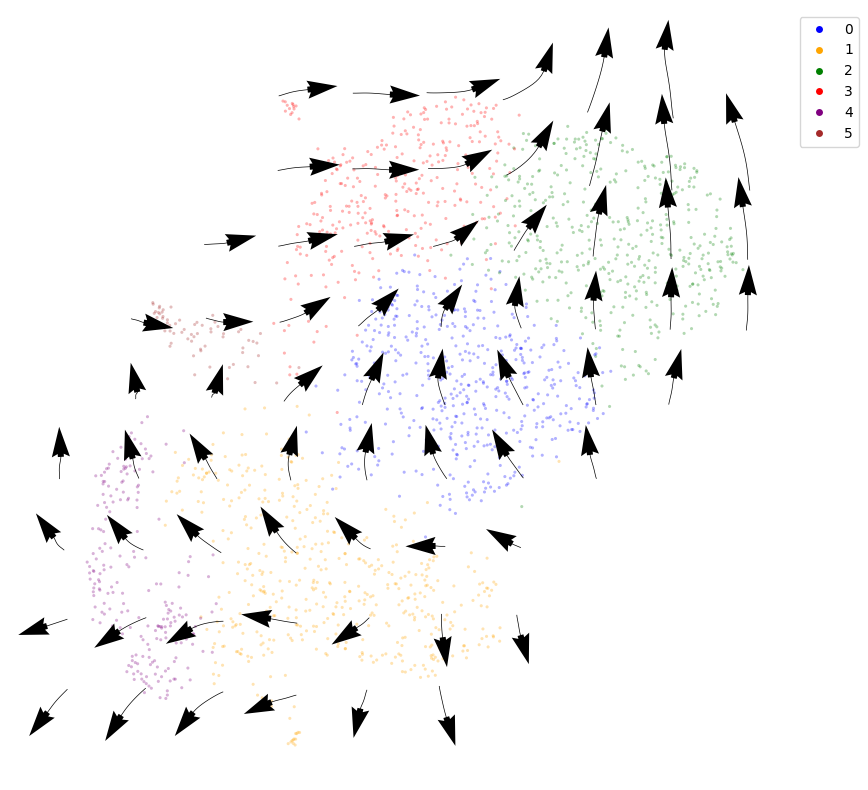

In [60]:
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df, projection_neighbor_choice='embedding', expression_scale='power10', projection_neighbor_size=200, speed_up=None)

# plot cell velocity
fig, ax = plt.subplots(figsize=(10,10))
im = cdplt.scatter_cell(ax,cellDancer_df,
                        colors=colormap1,
                        alpha=0.3,
                        s=5,
                        velocity=True,
                        legend='on',
                        min_mass=10,
                        arrow_grid=(10,10))
ax.axis('off')
plt.show()

### Calculate Module B velocity

In [62]:

loss_df, cellDancer_df=cd.velocity(cell_type_u_s,
                                   gene_list=pd.merge(Macro_2.var, gene[(gene.modularity_class == 'B')], left_index=True, right_index=True, how ='inner').index.tolist(),
                                   permutation_ratio=0.1,
                                   norm_u_s=True,
                                   norm_cell_distribution=True,
                                   n_jobs=8,)
cellDancer_df

Using /home/yang/PM_AD/Submission/Code/scRNA_seq/RNA_velocity/cellDancer_velocity_2025-02-04 14-01-50 as the output path.
Arranging genes for parallel job.
20  genes were arranged to  3  portions.



Velocity Estimation: 100%|██████████| 3/3 [00:17<00:00,  5.25s/it]                                                                      
                                                                                                                                        

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,DNAJA4,0.179347,0.121916,0.131324,0.309807,0.059280,0.800365,0.292224,0.112439,ACAGCTATCGCTTGTC-1-SKN8090528,1,10.493832,0.988215
1,1,DNAJA4,0.210864,0.122728,0.151134,0.344262,0.062295,0.798326,0.293493,0.112439,ATCTGCCCACAGACTT-1-SKN8090528,1,11.083227,1.192800
2,2,DNAJA4,0.055430,0.784847,0.040604,0.807773,0.021438,0.849938,0.254329,0.112439,GTCAAGTCAAACCTAC-1-SKN8090528,0,11.414932,5.994781
3,3,DNAJA4,0.006940,0.029359,0.025706,0.035284,0.046054,0.810093,0.284357,0.112439,TCAGCAAGTTACCGAT-1-SKN8090528,1,9.525815,2.316827
4,4,DNAJA4,0.185298,0.012914,0.139181,0.211861,0.067031,0.792526,0.297288,0.112439,AACCGCGGTCTCTTTA-1-SKN8090530,2,12.354959,7.746765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40875,2039,CD83,2.643810,6.104717,1.833389,4.937375,0.045480,5.135813,6.315879,0.065932,CGAACATGTCTCCACT-1-4820STDY7389011,1,7.460812,3.404850
40876,2040,CD83,2.605074,4.145122,1.954799,3.709732,0.080638,5.012954,6.188900,0.065932,CGATGTAAGTCGTTTG-1-4820STDY7389011,1,7.914448,3.009568
40877,2041,CD83,3.995501,5.611037,2.838240,5.228801,0.086392,5.115913,6.269463,0.065932,GAGGTGAGTCAGATAA-1-4820STDY7389011,1,10.740385,2.572058
40878,2042,CD83,4.864790,5.282411,3.497930,5.404415,0.116450,5.107984,6.249029,0.065932,GGATGTTCAATAACGA-1-4820STDY7389011,1,10.048653,2.051215


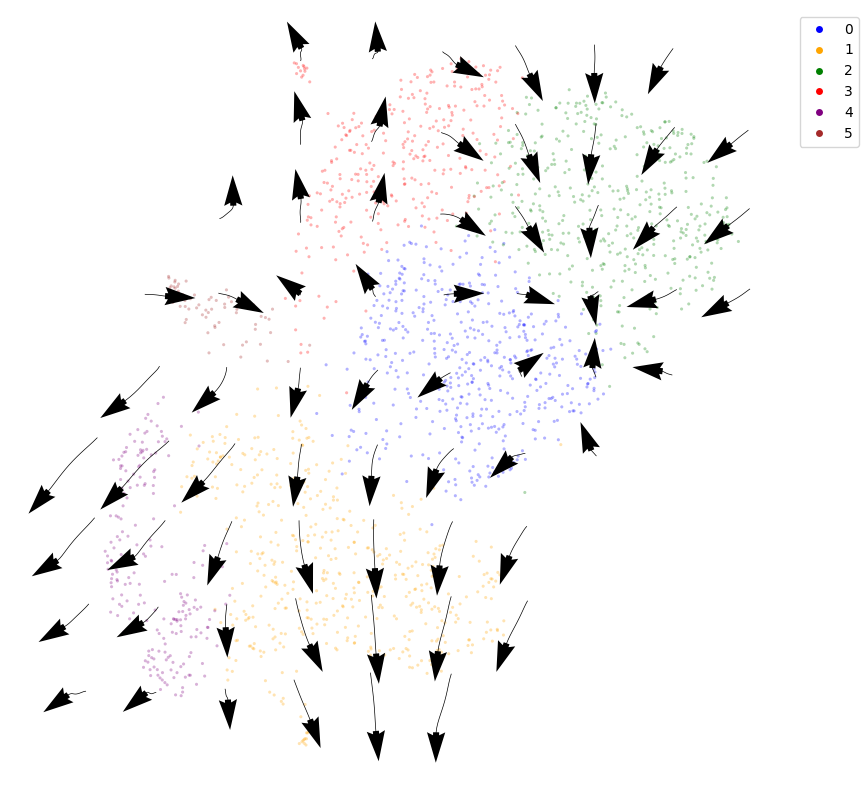

In [63]:
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df, projection_neighbor_choice='embedding', expression_scale='power10', projection_neighbor_size=200, speed_up=None)

# plot cell velocity
fig, ax = plt.subplots(figsize=(10,10))
im = cdplt.scatter_cell(ax,cellDancer_df,
                        colors=colormap1,
                        alpha=0.3,
                        s=5,
                        velocity=True,
                        legend='on',
                        min_mass=10,
                        arrow_grid=(10,10))
ax.axis('off')
plt.show()